<a href="https://colab.research.google.com/github/hbisgin/datamining/blob/main/tf_idf_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

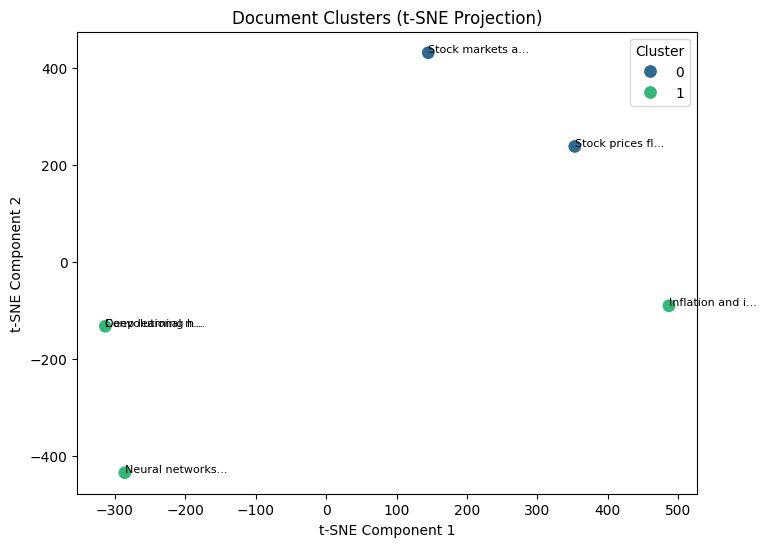

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# my corpus
documents = [
    "Neural networks are widely used in deep learning.",
    "Convolutional neural networks are effective for image recognition.",
    "Stock markets are influenced by economic policies.",
    "Inflation and interest rates impact the global economy.",
    "Deep learning has applications in natural language processing.",
    "Stock prices fluctuate based on global economic conditions."
]

# You don't have to do calculations by hand. ALready available library for TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Applying K-Means clustering.Please just use it now
num_clusters = 2  # You can change this
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# We reduce dimensions using t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=3, random_state=42)
X_embedded = tsne.fit_transform(X.toarray())

# Now we plot the transformed data as we did in PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=clusters, palette="viridis", s=100)
for i, txt in enumerate(documents):
    plt.annotate(txt[:15] + "...", (X_embedded[i, 0], X_embedded[i, 1]), fontsize=8)

plt.title("Document Clusters (t-SNE Projection)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Cluster")
plt.show()